In [1]:
import model as m
from sklearn.linear_model import LogisticRegression
# we intend to test each solver independently and then compare them afterwards
clf_newton = m.Classifier(1,LogisticRegression(solver ='newton-cg'))
clf_saga = m.Classifier(1,LogisticRegression(solver ='saga'))
clf_lib = m.Classifier(1,LogisticRegression(solver ='liblinear'))
clf_sag = m.Classifier(1,LogisticRegression(solver ='sag'))
clf_general = m.Classifier(1,LogisticRegression()) # can be used after to furher improve


In [1]:
#stop word sets specified for this data set
path = "../data/stop_words_news_groups/"
with open(path+"stop_words_no_numbers.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)

In [3]:
params_trial_1 = { 
            'vect__max_features': (1000,10000,20000),
            'vect__ngram_range': ((1, 1), (1, 2)),
            'tfidf__norm': ('l1','l2',None),
            'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([100,200]), #two extremes
            'clf__C':(7,5,1.0),
            }
#### TEST 1 looking at saga ####
clf_saga.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 38.5min finished


done in 2313.141s

scores!
mean: 0.574 std: (+/-0.005) for {'clf__C': 7, 'clf__max_iter': 100, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.582 std: (+/-0.007) for {'clf__C': 7, 'clf__max_iter': 100, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.571 std: (+/-0.008) for {'clf__C': 7, 'clf__max_iter': 100, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.581 std: (+/-0.007) for {'clf__C': 7, 'clf__max_iter': 100, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.698 std: (+/-0.011) for {'clf__C': 7, 'clf__max_iter': 100, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.699 std: (+/-0.010) for {'clf__C': 7, 'clf__max_iter': 100, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ng

Confusion Matrix
[[147   2   2   1   1   1   2   3   6  12   2   1   4   8  15  48   9   9
   11  35]
 [  3 277  21   9   7  17   9   3   1  11   0   5  12   2   9   1   1   1
    0   0]
 [  2  22 240  38  16  13   6   4   1  17   1   3   2   7  10   2   1   2
    5   2]
 [  0  12  40 256  23   7  14   2   1   9   2   2  23   0   1   0   0   0
    0   0]
 [  3   9   9  27 263   2  16   4   1  16   2   3  21   3   3   0   2   0
    0   1]
 [  0  44  37  11   1 269   2   2   2  10   0   3   5   1   4   0   3   0
    0   1]
 [  0   2   4  20  16   0 303   9   5   9   1   1  12   1   2   0   3   0
    1   1]
 [  4   2   1   2   2   1  12 279  23  28   2   0  19   2   7   1   3   2
    5   1]
 [  3   3   1   1   0   1   6  25 297  19   1   0  11   6   9   1   3   0
    8   3]
 [  1   3   0   1   0   2   6   3   6 326  23   0   2   4   4   4   2   3
    7   0]
 [  3   1   1   0   1   1   1   2   2  28 341   0   2   3   1   0   6   0
    3   3]
 [  4   9   5   5   5   2  10   4   4  21   1 26

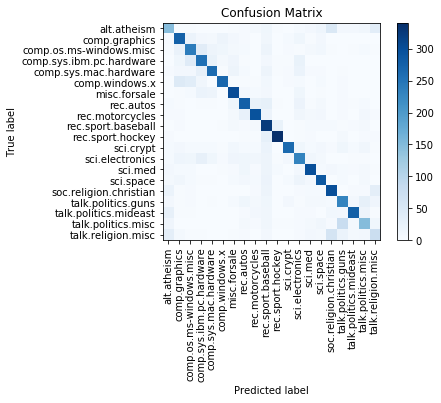

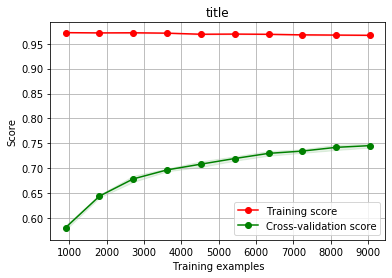

Finding most common params for the top 44 values
[{1.0: 12, 7: 16, 5: 16}, {200: 22, 100: 22}, {'l2': 44}, {10000: 20, 20000: 24}, {(1, 1): 24, (1, 2): 20}, {0: 22, 1: 22}]


In [4]:
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf_saga.eval_best_n_params(0.8) #top 30%

In [10]:
clf_saga.eval_best_n_params(0.9) #top 30%

Finding most common params for the top 22 values
[{1.0: 6, 7: 8, 5: 8}, {200: 11, 100: 11}, {'l2': 22}, {20000: 22}, {(1, 2): 10, (1, 1): 12}, {0: 12, 1: 10}]


In [16]:
See
params_trial_2 = { 
            #penalty is l2 by default
            'vect__max_features': (20000,40000,60000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 1),(1, 2)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([50,250]), #two extremes
            'clf__C':(7,6.5,6,5.5),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 16.8min finished


done in 1012.953s

scores!
mean: 0.745 std: (+/-0.010) for {'clf__C': 7, 'clf__max_iter': 50, 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.743 std: (+/-0.009) for {'clf__C': 7, 'clf__max_iter': 50, 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.740 std: (+/-0.014) for {'clf__C': 7, 'clf__max_iter': 50, 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.737 std: (+/-0.009) for {'clf__C': 7, 'clf__max_iter': 50, 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.756 std: (+/-0.009) for {'clf__C': 7, 'clf__max_iter': 50, 'tfidf__norm': 'l2', 'vect__max_features': 40000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.754 std: (+/-0.009) for {'clf__C': 7, 'clf__max_iter': 50, 'tfidf__norm': 'l2', 'vect__max_features': 40000, 'vect__ngra

Confusion Matrix
[[151   2   4   1   1   1   2  13   5   4   1   1   4   7  13  50   8  10
    9  32]
 [  4 283  16   8   7  18   9   9   4   4   0   6   8   2   8   1   1   1
    0   0]
 [  2  18 243  41  16  11   6  20   2   1   1   4   1   8  10   2   1   1
    4   2]
 [  1  12  35 259  25   6  14   9   0   1   2   2  25   0   1   0   0   0
    0   0]
 [  3   8  10  26 264   2  14  21   0   2   1   3  21   3   3   0   2   1
    0   1]
 [  0  44  36  10   1 274   2   9   1   2   0   3   4   1   4   0   3   0
    0   1]
 [  1   2   2  19  15   0 309  15   5   0   2   1  10   1   2   1   2   1
    1   1]
 [  4   1   1   3   2   2  12 307  19   4   2   0  19   3   7   1   1   2
    5   1]
 [  3   3   1   0   1   1   5  38 304   6   0   0  10   4   7   1   3   0
    9   2]
 [  1   2   0   1   0   2   5  21   4 317  20   0   2   4   3   4   2   2
    7   0]
 [  1   1   1   0   0   1   1  12   2  18 343   0   1   3   1   2   6   1
    2   3]
 [  4   9   4   4   8   0   9  19   4   4   1 27

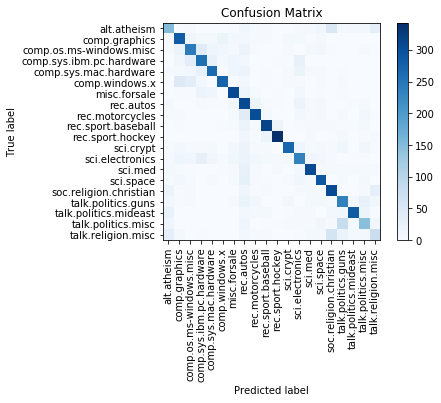

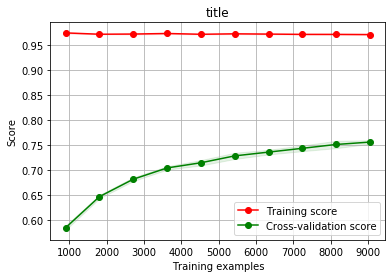

In [17]:
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [25]:
clf_saga.eval_best_n_params(0.7) #top 20%

Finding most common params for the top 29 values
[{5.5: 5, 6: 7, 7: 9, 6.5: 8}, {50: 15, 250: 14}, {'l2': 29}, {40000: 7, 60000: 22}, {(1, 1): 17, (1, 2): 12}, {0: 23, 1: 6}]


In [27]:
#N-grams and stop words still arent clear
#further pinpoint max_iter, max_feature, and C
params_trial_3 = { 
            #penalty is l2 by default
            'vect__max_features': (50000,75000,100000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 1),(1, 2)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([30,50,80]), #two extremes
            'clf__C':(8.5,8,7.5),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 20.9min finished


done in 1267.230s

scores!
mean: 0.756 std: (+/-0.010) for {'clf__C': 8.5, 'clf__max_iter': 30, 'tfidf__norm': 'l2', 'vect__max_features': 50000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.753 std: (+/-0.009) for {'clf__C': 8.5, 'clf__max_iter': 30, 'tfidf__norm': 'l2', 'vect__max_features': 50000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.754 std: (+/-0.009) for {'clf__C': 8.5, 'clf__max_iter': 30, 'tfidf__norm': 'l2', 'vect__max_features': 50000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.753 std: (+/-0.010) for {'clf__C': 8.5, 'clf__max_iter': 30, 'tfidf__norm': 'l2', 'vect__max_features': 50000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.758 std: (+/-0.009) for {'clf__C': 8.5, 'clf__max_iter': 30, 'tfidf__norm': 'l2', 'vect__max_features': 75000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.755 std: (+/-0.009) for {'clf__C': 8.5, 'clf__max_iter': 30, 'tfidf__norm': 'l2', 'vect__max_features': 75000,

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion Matrix
[[158   2   2   1   1   1   2  11   2   4   2   1   3   8  14  52   8  11
   11  25]
 [  4 282  19   6   8  18   9   9   2   5   1   6   9   1   7   1   1   1
    0   0]
 [  2  21 245  38  17  10   3  19   2   1   1   4   0   7  11   2   1   2
    5   3]
 [  0  15  33 261  24   3  13  10   0   3   2   1  26   0   1   0   0   0
    0   0]
 [  3   8  12  27 264   2  12  19   0   0   2   2  24   4   5   0   1   0
    0   0]
 [  0  46  37   7   2 273   2   8   1   2   0   5   4   1   3   0   3   0
    0   1]
 [  1   3   2  18  15   0 310  14   5   2   1   1   9   0   3   0   1   2
    2   1]
 [  4   1   1   2   2   2  12 314  18   4   2   0  14   4   5   1   3   3
    4   0]
 [  3   3   2   1   0   1   5  38 299   6   1   0  12   4   8   2   4   1
    6   2]
 [  3   2   1   0   0   1   6  21   5 321  16   0   2   5   2   4   2   1
    5   0]
 [  1   0   1   1   0   1   2  12   3  17 345   0   1   3   1   2   6   1
    1   1]
 [  4   9   5   3   9   2   7  20   6   3   1 27

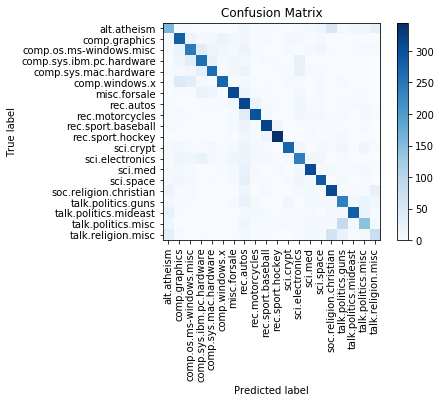

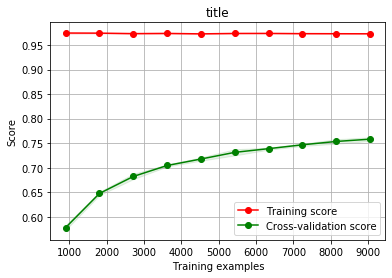

In [28]:
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [37]:
clf_saga.eval_best_n_params(0.97) #top 20%

Finding most common params for the top 4 values
[{8: 2, 8.5: 2}, {80: 1, 50: 2, 30: 1}, {'l2': 4}, {100000: 4}, {(1, 2): 4}, {0: 4}]


In [49]:
#We see high sucess for stop words 0 and N-gram 2 so we are setting that as default now
# we havent seen the best max_iter,max_features yet or C so still trying option
params_trial_3 = { 
            #penalty is l2 by default
            'vect__max_features': (150000,200000,250000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 2)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__max_iter': ([23,25,27]), #two extremes
            'clf__C':(8.4,8.25,8.1),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  6.5min finished


done in 398.277s

scores!
mean: 0.760 std: (+/-0.011) for {'clf__C': 8.4, 'clf__max_iter': 23, 'tfidf__norm': 'l2', 'vect__max_features': 150000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.761 std: (+/-0.012) for {'clf__C': 8.4, 'clf__max_iter': 23, 'tfidf__norm': 'l2', 'vect__max_features': 200000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.013) for {'clf__C': 8.4, 'clf__max_iter': 23, 'tfidf__norm': 'l2', 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.760 std: (+/-0.011) for {'clf__C': 8.4, 'clf__max_iter': 25, 'tfidf__norm': 'l2', 'vect__max_features': 150000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.761 std: (+/-0.014) for {'clf__C': 8.4, 'clf__max_iter': 25, 'tfidf__norm': 'l2', 'vect__max_features': 200000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.4, 'clf__max_iter': 25, 'tfidf__norm': 'l2', 'vect__max_features': 25

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion Matrix
[[157   2   3   1   1   1   3  12   3   5   2   1   3   7  12  54   8   8
   10  26]
 [  4 283  20   6   7  17   8   8   2   5   0   6  10   2   8   1   1   1
    0   0]
 [  3  20 249  39  16   9   3  19   2   1   1   4   0   5  11   2   1   2
    4   3]
 [  1  15  33 264  22   4  13  10   0   2   2   1  24   0   1   0   0   0
    0   0]
 [  3   7  12  26 266   1  12  19   1   0   2   3  23   4   4   0   1   0
    1   0]
 [  0  44  38   6   2 277   2   8   1   2   0   4   4   1   3   0   3   0
    0   0]
 [  1   3   2  18  17   0 310  13   4   2   1   1   8   0   2   2   3   1
    2   0]
 [  3   1   1   2   2   2  12 313  15   4   2   0  17   4   6   1   3   3
    4   1]
 [  3   3   2   0   2   1   5  38 304   6   0   0  10   4   7   2   2   1
    7   1]
 [  3   2   1   0   0   1   4  21   5 321  20   0   2   5   1   4   1   1
    4   1]
 [  1   1   1   1   1   1   1  12   3  13 349   0   1   2   1   2   6   1
    1   1]
 [  4  12   4   3   8   3   7  20   5   4   1 27

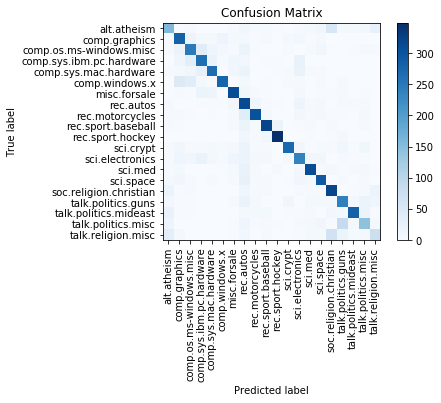

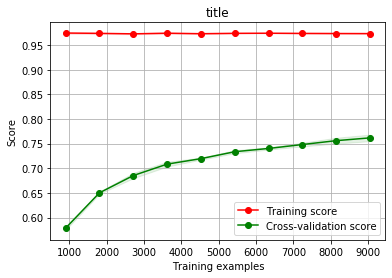

In [50]:
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [52]:
clf_saga.eval_best_n_params(0.8) #top 20%

Finding most common params for the top 6 values
[{8.1: 2, 8.4: 3, 8.25: 1}, {27: 4, 23: 2}, {'l2': 6}, {250000: 4, 200000: 2}, {(1, 2): 6}, {0: 6}]


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 47.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 86.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 95.0min finished


done in 5741.201s

scores!
mean: 0.758 std: (+/-0.008) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 100000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.761 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.761 std: (+/-0.012) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 275000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.758 std: (+/-0.007) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'saga', 'tfidf__norm': 'l2', 'vect__max_features': 100000, 'vect__ngram_range': (1, 2), '

Confusion Matrix
[[157   2   3   1   1   1   3  12   3   5   2   1   3   7  12  54   8   9
    9  26]
 [  4 284  20   6   7  17   8   8   2   5   0   5  10   2   8   1   1   1
    0   0]
 [  3  20 249  40  16   9   3  19   2   1   1   4   0   5  11   2   1   1
    4   3]
 [  1  15  33 265  22   4  13  10   0   1   2   1  24   0   1   0   0   0
    0   0]
 [  3   7  12  26 266   1  12  19   1   0   2   3  23   4   4   0   1   0
    1   0]
 [  0  45  38   6   2 276   2   8   1   2   0   4   4   1   3   0   3   0
    0   0]
 [  1   3   2  18  17   0 309  13   5   2   1   1   8   0   2   2   3   1
    2   0]
 [  3   1   1   2   2   2  12 313  16   4   2   0  16   4   6   1   3   3
    4   1]
 [  3   3   2   0   1   1   5  38 305   6   0   0  10   5   7   2   2   1
    6   1]
 [  3   2   1   0   0   1   4  21   5 324  18   0   2   5   1   4   1   1
    3   1]
 [  1   1   1   1   1   1   1  12   3  15 347   0   1   2   1   1   6   1
    2   1]
 [  4  12   4   3   8   3   7  20   5   4   1 27

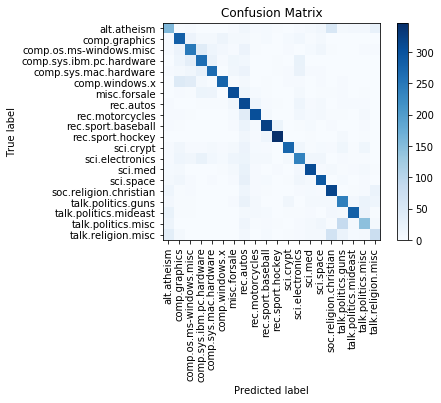

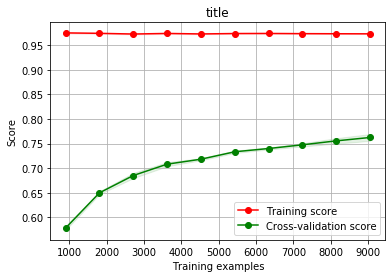

Finding most common params for the top 44 values
[{8.5: 16, 8.4: 16, 8.3: 12}, {500: 15, 27: 15, 150: 14}, {'sag': 11, 'saga': 18, 'liblinear': 6, 'newton-cg': 9}, {'l2': 44}, {250000: 11, 225000: 33}, {(1, 2): 44}, {0: 44}]


In [55]:
#a 1.7 point increase in total
#at this point we will now introduce otehr solvers
params_trial_4 = { 
            #penalty is l2 by default
            'vect__max_features': (100000,225000,250000,275000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 2)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__solver': ['newton-cg','saga','sag','liblinear'],
            'clf__max_iter': ([27,150,500]), #two extremes (for the new solvers)
            'clf__C':(8.5,8.4,8.3),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_4,5)
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf_saga.eval_best_n_params(0.7) #top 20%

In [59]:
clf_saga.eval_best_n_params(0.95)

Finding most common params for the top 8 values
[{8.5: 3, 8.4: 5}, {150: 3, 500: 4, 27: 1}, {'sag': 4, 'newton-cg': 4}, {'l2': 8}, {225000: 8}, {(1, 2): 8}, {0: 8}]


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 26.1min finished


done in 1603.273s

scores!
mean: 0.757 std: (+/-0.011) for {'clf__C': 8.4, 'clf__max_iter': 250, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 200000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.013) for {'clf__C': 8.4, 'clf__max_iter': 250, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 200000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.757 std: (+/-0.011) for {'clf__C': 8.4, 'clf__max_iter': 250, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 225000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.4, 'clf__max_iter': 250, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.757 std: (+/-0.011) for {'clf__C': 8.4, 'clf__max_iter': 250, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 235000, 'vect__ngram_range':

Confusion Matrix
[[157   2   3   1   1   1   3  12   3   5   2   1   3   7  12  54   8   9
    9  26]
 [  4 284  20   6   7  17   8   8   2   5   0   5  10   2   8   1   1   1
    0   0]
 [  3  20 249  40  16   9   3  19   2   1   1   4   0   5  11   2   1   1
    4   3]
 [  1  15  33 265  22   4  13  10   0   1   2   1  24   0   1   0   0   0
    0   0]
 [  3   7  12  26 266   1  12  19   1   0   2   3  23   4   4   0   1   0
    1   0]
 [  0  45  38   6   2 276   2   8   1   2   0   4   4   1   3   0   3   0
    0   0]
 [  1   3   2  18  17   0 309  13   5   2   1   1   8   0   2   2   3   1
    2   0]
 [  3   1   1   2   2   2  12 313  16   4   2   0  16   4   6   1   3   3
    4   1]
 [  3   3   2   0   1   1   5  38 305   6   0   0  10   5   7   2   2   1
    6   1]
 [  3   2   1   0   0   1   4  21   5 324  18   0   2   5   1   4   1   1
    3   1]
 [  1   1   1   1   1   1   1  12   3  15 347   0   1   2   1   1   6   1
    2   1]
 [  4  12   4   3   8   3   7  20   5   4   1 27

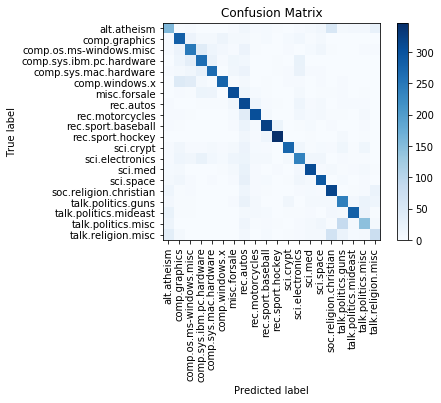

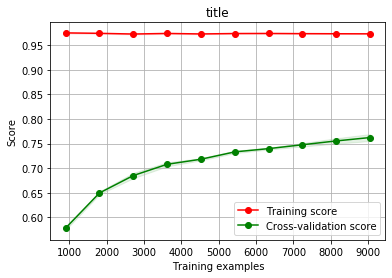

Finding most common params for the top 15 values
[{8.4: 7, 8.3: 8}, {250: 7, 500: 8}, {'sag': 8, 'newton-cg': 7}, {'l2': 15}, {200000: 7, 225000: 8}, {(1, 2): 15}, {0: 15}]


In [61]:
#we can remove saga and linlinear
params_trial_4 = { 
            #penalty is l2 by default
            'vect__max_features': (200000,225000,235000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1,1),(1, 2)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__solver': ['newton-cg','sag'],
            'clf__max_iter': ([250,500]), #two extremes (for the new solvers)
            'clf__C':(8.4,8.3),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_4,5)
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf_saga.eval_best_n_params(0.7) #top 20%

In [66]:
clf_saga.eval_best_n_params(0.9) #top 20%

Finding most common params for the top 5 values
[{8.3: 1, 8.4: 4}, {500: 3, 250: 2}, {'sag': 3, 'newton-cg': 2}, {'l2': 5}, {225000: 5}, {(1, 2): 5}, {0: 5}]


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 14.9min remaining: 14.9min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed: 15.3min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 15.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 15.5min finished


done in 970.364s

scores!
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.4, 'clf__max_iter': 500, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 220000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.4, 'clf__max_iter': 500, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.4, 'clf__max_iter': 500, 'clf__solver': 'sag', 'tfidf__norm': 'l2', 'vect__max_features': 220000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.4, 'clf__max_iter': 500, 'clf__solver': 'sag', 'tfidf__norm': 'l2', 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
Best score:
0.762 (+/-0.014)
with parameters set:
	clf__C: 8.4
	clf__max_iter: 500
	clf__solver: 'newton-cg'
	tfidf__norm: 'l2'
	vect__max_features: 225000
	vect__ngram_range: (1, 2)

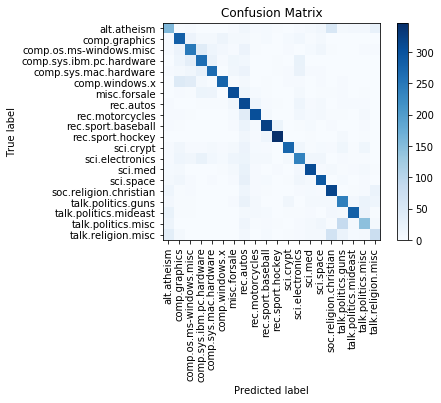

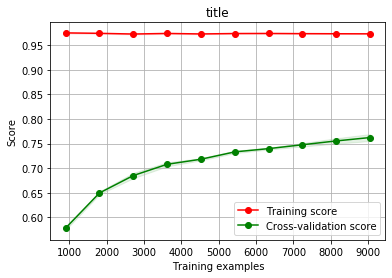

Finding most common params for the top 2 values
[{8.4: 2}, {500: 2}, {'newton-cg': 1, 'sag': 1}, {'l2': 2}, {225000: 2}, {(1, 2): 2}, {0: 2}]


In [68]:
#0.7623304667051904
#we can remove saga and linlinear
# we have settled on the C value of 8.5
# We will also temporarily settle on the max_iter at 500
# the goal here is to searcj for the optimal solver and max_Feauture
params_trial_5 = { 
            #penalty is l2 by default
            'vect__max_features': (226000,225000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 2)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__solver': ['newton-cg','sag'],
            'clf__max_iter': ([500]), #two extremes (for the new solvers)
            'clf__C':([8.5]),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_5,5)
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf_saga.eval_best_n_params(0.7) #top 20%

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  5.3min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  5.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.1min finished


done in 464.544s

scores!
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.725 std: (+/-0.011) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 500, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.725 std: (+/-0.011) for {'clf__C': 8.5, 'clf__max_iter': 500, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
Best score:
0.762 (+/-0.011)
with parameters set:
	clf__C: 8.5
	clf__max_i

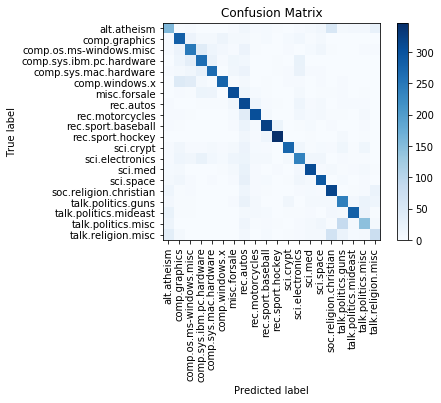

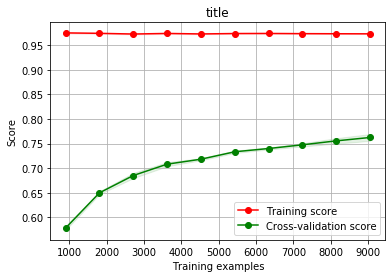

Finding most common params for the top 2 values
[{8.5: 2}, {27: 1, 500: 1}, {'newton-cg': 2}, {'l2': 2}, {True: 2}, {225000: 2}, {(1, 2): 2}, {0: 2}]


In [78]:
#0.7623304667051904
#we can remove saga and linlinear
# we have settled on the C value of 8.5
# We will also temporarily settle on the max_iter at 500
# the goal here is to searcj for the optimal solver and max_Feauture
#OPTIMIZE NEWTON using max_iter
params_trial_6 = { 
            #penalty is l2 by default
            'vect__max_features': ([225000]), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 2)]),
            'tfidf__use_idf': (True,False),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__solver': ['newton-cg',],
            'clf__max_iter': ([27,500]), #previous best versus new best
            'clf__C':([8.5]),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_6,5)
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf_saga.eval_best_n_params(0.7) #top 20%

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:  9.6min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.9min finished


done in 693.319s

scores!
mean: 0.746 std: (+/-0.015) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_df': 0.7, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_df': 0.7, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.746 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_df': 0.8, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.762 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l2', 'vect__max_df': 0.8, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.745 std: (+/-0.014) for {'clf__C': 8.5, 'clf__max_iter': 27, 'clf__solver': 

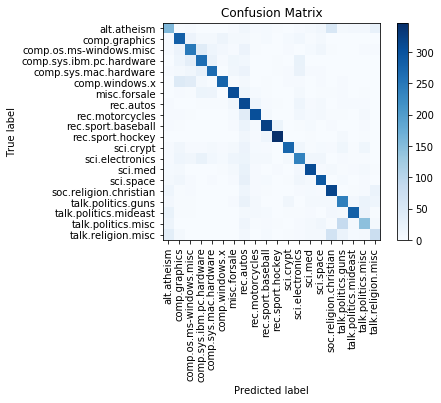

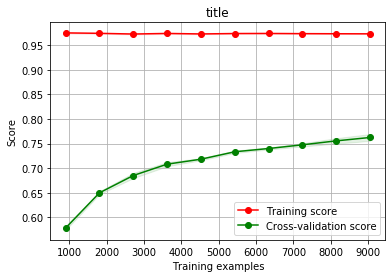

Finding most common params for the top 2 values
[{8.5: 2}, {27: 2}, {'newton-cg': 2}, {'l2': 2}, {0.8: 1, 0.9: 1}, {225000: 2}, {(1, 2): 2}, {1: 2}]


In [80]:
# One last big test for stop words
params_trial_7 = { 
            #penalty is l2 by default
            'vect__max_features': ([225000]), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.7,0.8,0.9]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [None,stop_words_no_nums],
            'clf__solver': ['newton-cg',],
            'clf__max_iter': ([27]), #previous best versus new best
            'clf__C':([8.5]),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_7,5)
clf_saga.plot_cm([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf_saga.eval_best_n_params(0.7) #top 20%

Evaluation on test set:

Accuracy Score : 0.699814126394052
Precision Score : 0.699814126394052
Recall Score : 0.699814126394052
F1 Score : 0.699814126394052
Confusion Matrix
[[157   2   3   1   1   1   3  12   3   5   2   1   3   7  12  54   8   9
    9  26]
 [  4 284  20   6   7  17   8   8   2   5   0   5  10   2   8   1   1   1
    0   0]
 [  3  20 249  40  16   9   3  19   2   1   1   4   0   5  11   2   1   1
    4   3]
 [  1  15  33 265  22   4  13  10   0   1   2   1  24   0   1   0   0   0
    0   0]
 [  3   7  12  26 266   1  12  19   1   0   2   3  23   4   4   0   1   0
    1   0]
 [  0  45  38   6   2 276   2   8   1   2   0   4   4   1   3   0   3   0
    0   0]
 [  1   3   2  18  17   0 309  13   5   2   1   1   8   0   2   2   3   1
    2   0]
 [  3   1   1   2   2   2  12 313  16   4   2   0  16   4   6   1   3   3
    4   1]
 [  3   3   2   0   1   1   5  38 305   6   0   0  10   5   7   2   2   1
    6   1]
 [  3   2   1   0   0   1   4  21   5 324  18   0   2   5   

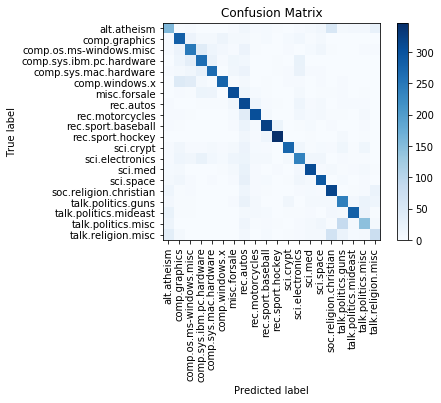

In [82]:
clf_saga.eval_on_test([],False)